# csvファイルを読み込む

In [29]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

df = [0] * 4
files = ["log_2023_05_31_09_51_57.csv", "log_2023_05_31_09_58_27.csv", "log_2023_05_31_10_03_58.csv", "log_2023_05_31_10_10_33.csv", ]

for i in range(4):
    df[i] = pd.read_csv(files[i], 
    names = ["n","y","x0","x1","x2","x3","ymax","x0max","x1max","x2max","x3max"],
    encoding="SHIFT-JIS")


# ループ数とBPM値のグラフを描写

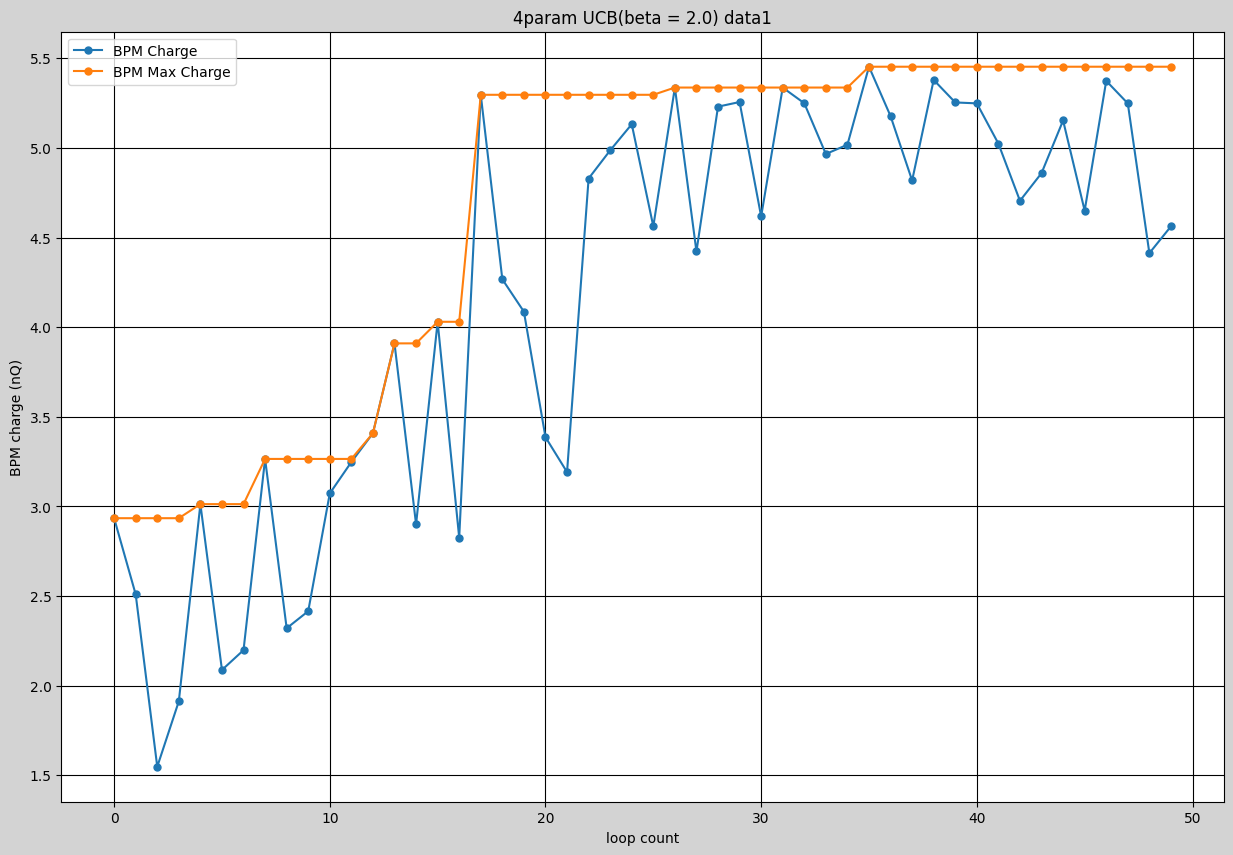

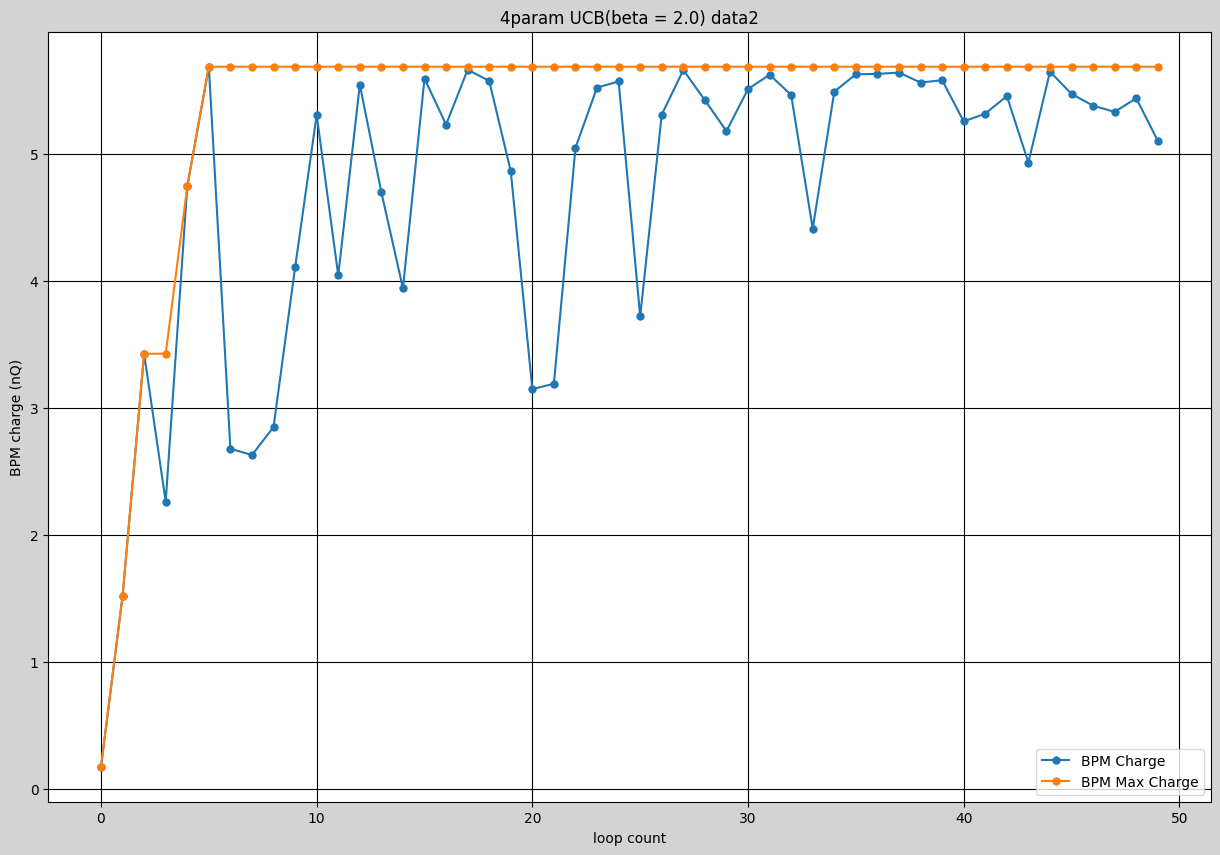

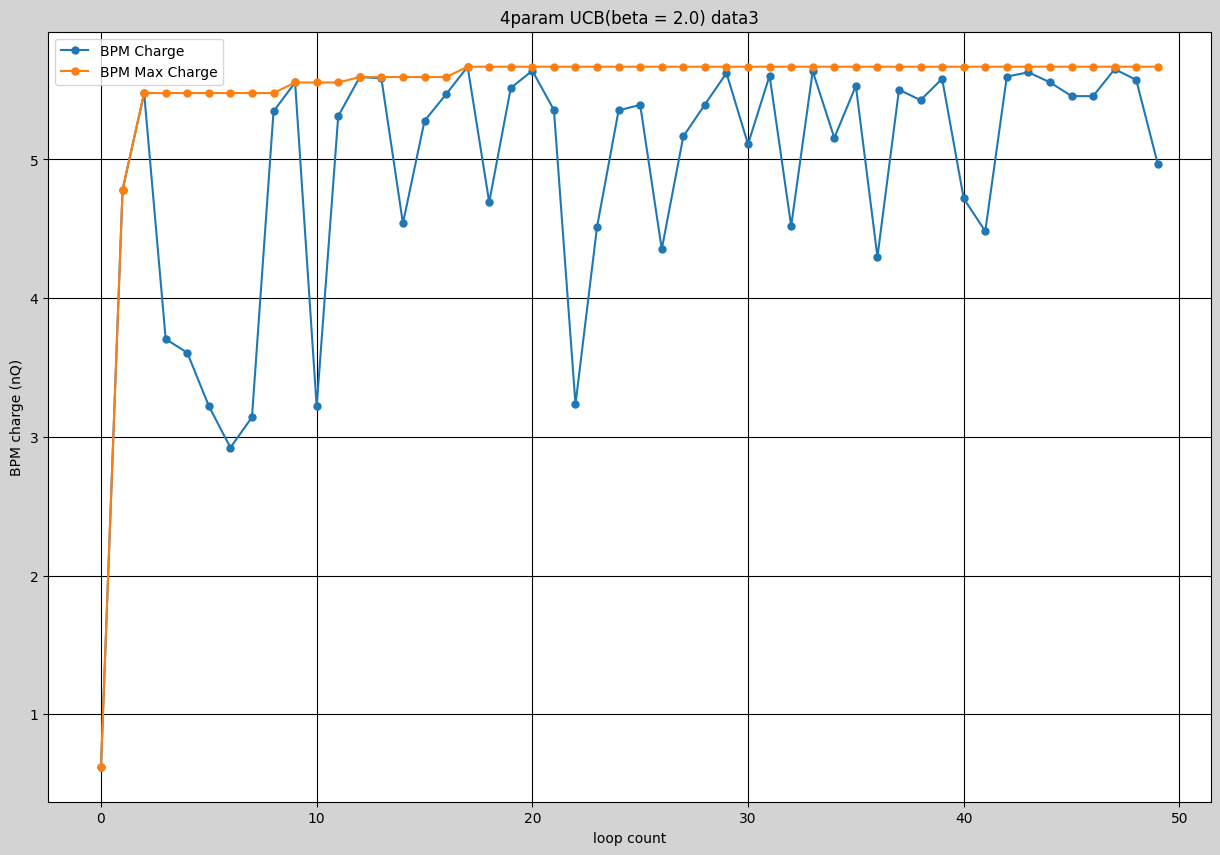

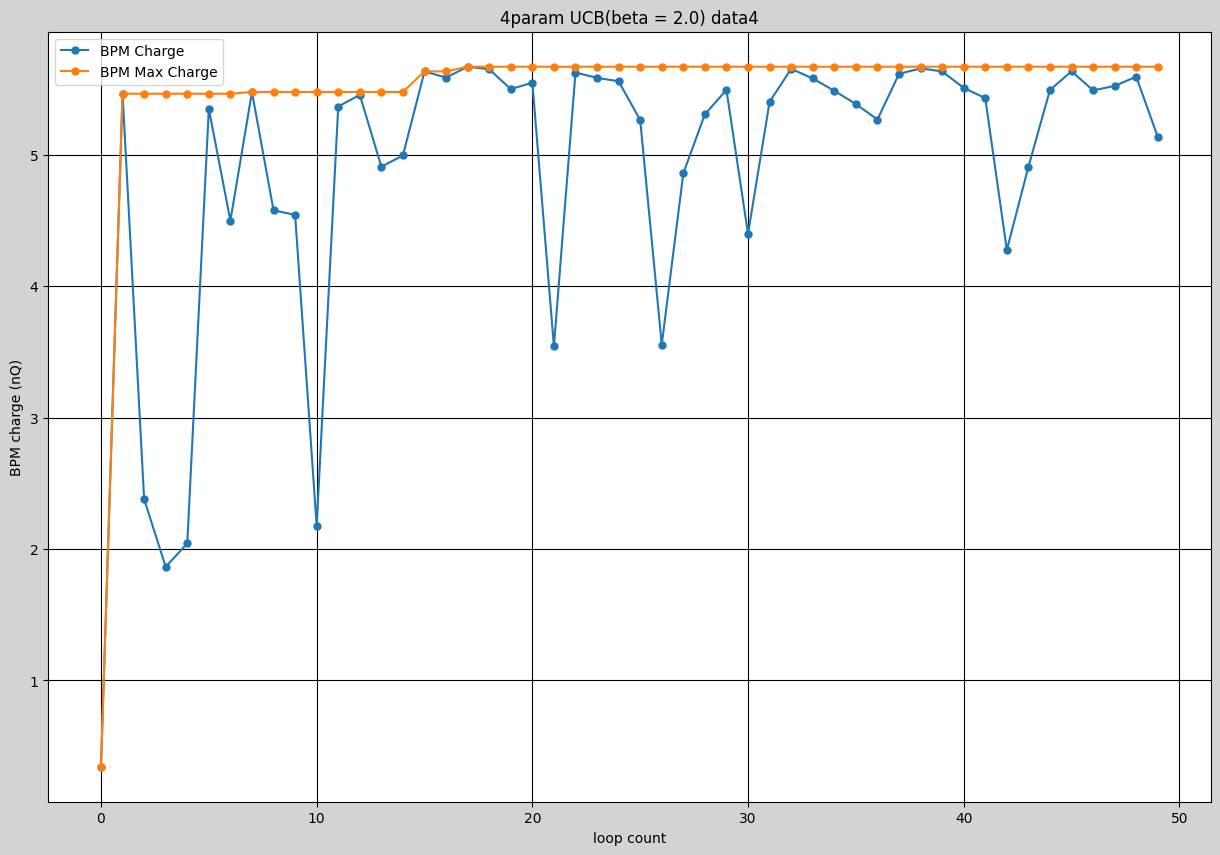

In [30]:
import matplotlib.pyplot as plt

for i in range (4):

    figi,axi = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

    plt.plot(df[i]["n"],df[i]["y"], marker = "." , markersize = 10,label = "BPM Charge")
    plt.plot(df[i]["n"],df[i]["ymax"], marker = "." , markersize = 10 , label = "BPM Max Charge")

    axi.grid(which = "major" , color = "black" , linestyle = "-")
    axi.set_xlabel("loop count")
    axi.set_ylabel("BPM charge (nQ)")
    axi.legend()
    axi.set_title('4param UCB(beta = 2.0) data' + str(i+1))


# 各最大値を比較

Text(0.5, 1.0, '4param UCB(beta = 2.0) All data')

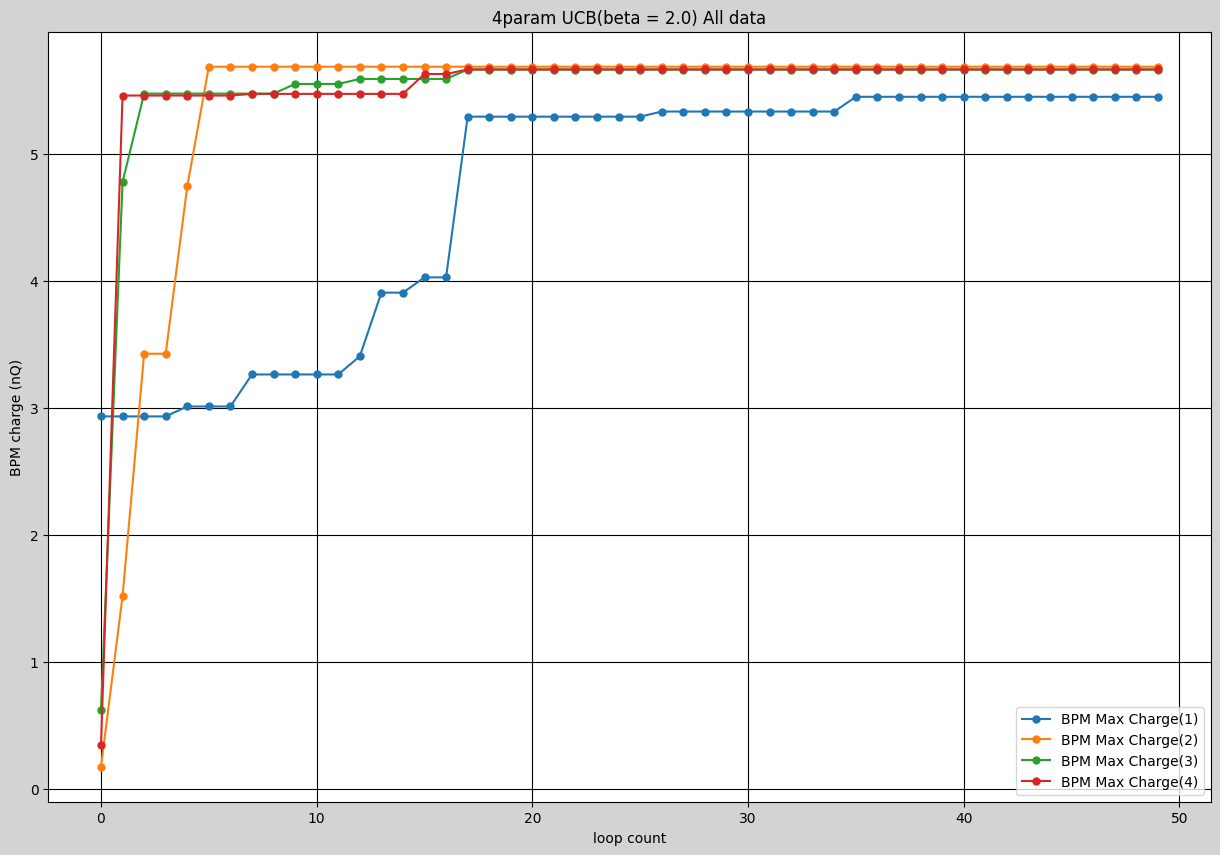

In [31]:
fig_sum,ax_sum = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

for i in range (4):

    plt.plot(df[i]["n"],df[i]["ymax"], marker = "." , markersize = 10 , label = "BPM Max Charge(" + str(i+1) + ")")
    
ax_sum.grid(which = "major" , color = "black" , linestyle = "-")
ax_sum.set_xlabel("loop count")
ax_sum.set_ylabel("BPM charge (nQ)")
ax_sum.legend()
ax_sum.set_title('4param UCB(beta = 2.0) All data')

# 平均を描写

5.620023727416992


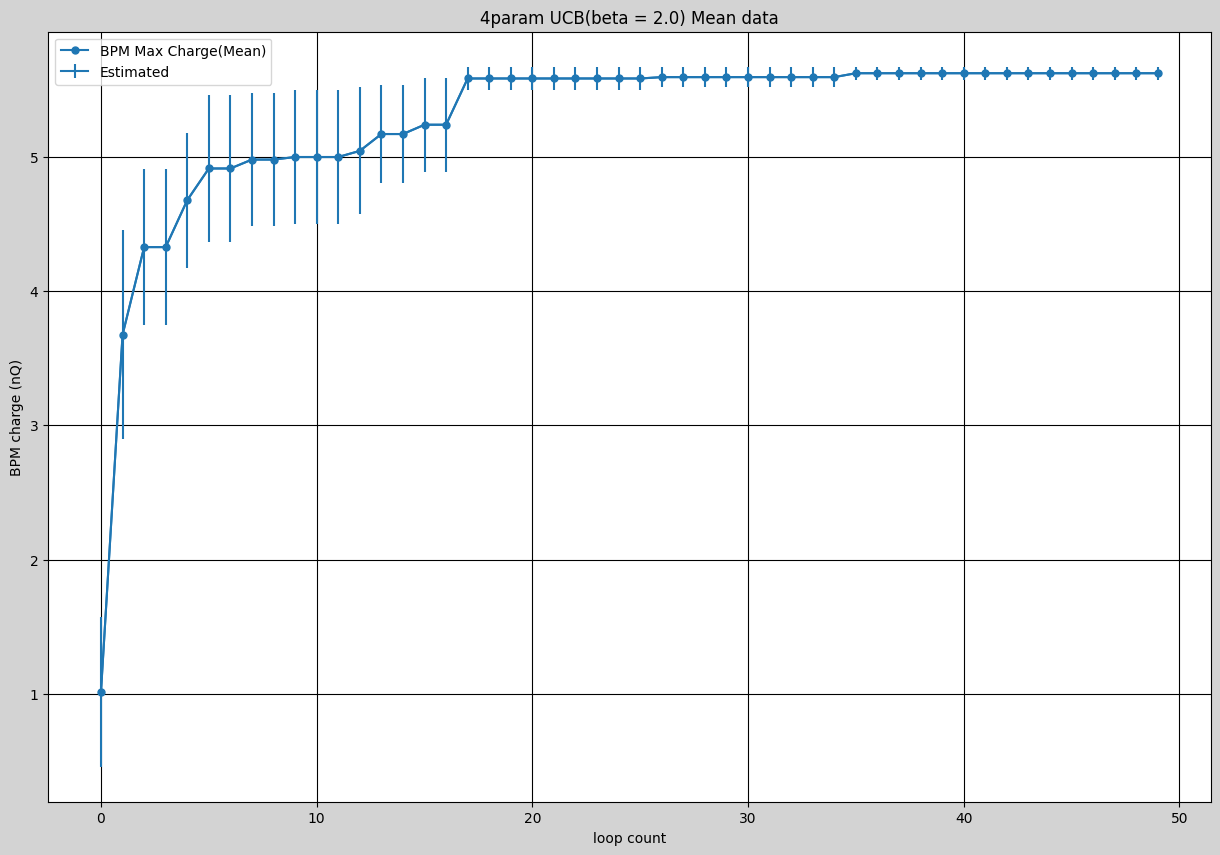

In [32]:
fig_ave,ax_ave = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

sum = 0
sum_minus_mean = 0


for j in range (4):

    sum = sum + df[j]["ymax"]

mean = sum/(j+1)

for i in range (4):
    
    sum_minus_mean = sum_minus_mean + (df[i]["ymax"] - mean)**2

error = ((sum_minus_mean)**(0.5))/(i+1)

plt.plot(df[0]["n"],mean, marker = "." , markersize = 10 , label = "BPM Max Charge(Mean)")
plt.errorbar(df[0]["n"],mean, yerr=error, label='Estimated', color='C0')

ax_ave.grid(which = "major" , color = "black" , linestyle = "-")
ax_ave.set_xlabel("loop count")
ax_ave.set_ylabel("BPM charge (nQ)")
ax_ave.legend()
ax_ave.set_title('4param UCB(beta = 2.0) Mean data')

print(mean[49])

In [38]:
from fanova import fANOVA
import pandas as pd
import csv

df = [0] * 4
files = ["log_2023_05_31_09_51_57.csv", "log_2023_05_31_09_58_27.csv", "log_2023_05_31_10_03_58.csv", "log_2023_05_31_10_10_33.csv" ]

for i in range(4):
    df[i] = pd.read_csv(files[i], 
    names = ["n","y","x0","x1","x2","x3","ymax","x0max","x1max","x2max","x3max"],
    encoding="SHIFT-JIS")


X0 = df[0][["x0","x1","x2","x3"]]
Y0 = df[0]["y"]
f0 = fANOVA(X0,Y0)

X1 = df[1][["x0","x1","x2","x3"]]
Y1 = df[1]["y"]
f1 = fANOVA(X1,Y1)

X2 = df[2][["x0","x1","x2","x3"]]
Y2 = df[2]["y"]
f2 = fANOVA(X2,Y2)

X3 = df[3][["x0","x1","x2","x3"]]
Y3 = df[3]["y"]
f3 = fANOVA(X3,Y3)

print(f3.quantify_importance((0,1,2,3,)))
#f1.quantify_importance((0,1,2,3))
#f2.quantify_importance((0,1,2,3))
#f3.quantify_importance((0,1,2,3))


i0 = (0.09932601707587882 + 0.1567340822301636 + 0.41953159611909063 + 0.4256352294537455)/4

i1 = (0.14205384280753836 + 0.1028482887359976 + 0.13760518756956286 + 0.11288461992760629)/4

i2 = (0.06725018223607959 + 0.3046746685817965 + 0.0842465801483936 + 0.19900094088324582)/4

i3 = (0.37156389586489524 + 0.23571481181688997 + 0.18282611593123002 + 0.10979656218910903)/4

I0 = i0/(i0+i1+i2+i3)
I1 = i1/(i0+i1+i2+i3)
I2 = i2/(i0+i1+i2+i3)
I3 = i3/(i0+i1+i2+i3)


{(0,): {'individual importance': 0.3004263392395881, 'total importance': 0.3004263392395881, 'individual std': 0.34070370228177216, 'total std': 0.34070370228177216}, (1,): {'individual importance': 0.11745259892379024, 'total importance': 0.11745259892379024, 'individual std': 0.1748507506158534, 'total std': 0.1748507506158534}, (2,): {'individual importance': 0.18709876828482996, 'total importance': 0.18709876828482996, 'individual std': 0.20032873613215063, 'total std': 0.20032873613215063}, (3,): {'individual importance': 0.17539557357724542, 'total importance': 0.17539557357724542, 'individual std': 0.27637252399476187, 'total std': 0.27637252399476187}, (0, 1): {'individual importance': 0.03294640454450519, 'total importance': 0.45082534270788355, 'individual std': 0.05848034100981912, 'total std': 0.35352915634299265}, (0, 2): {'individual importance': 0.03941581365249275, 'total importance': 0.5269409211769108, 'individual std': 0.0782673154883732, 'total std': 0.3292012555033

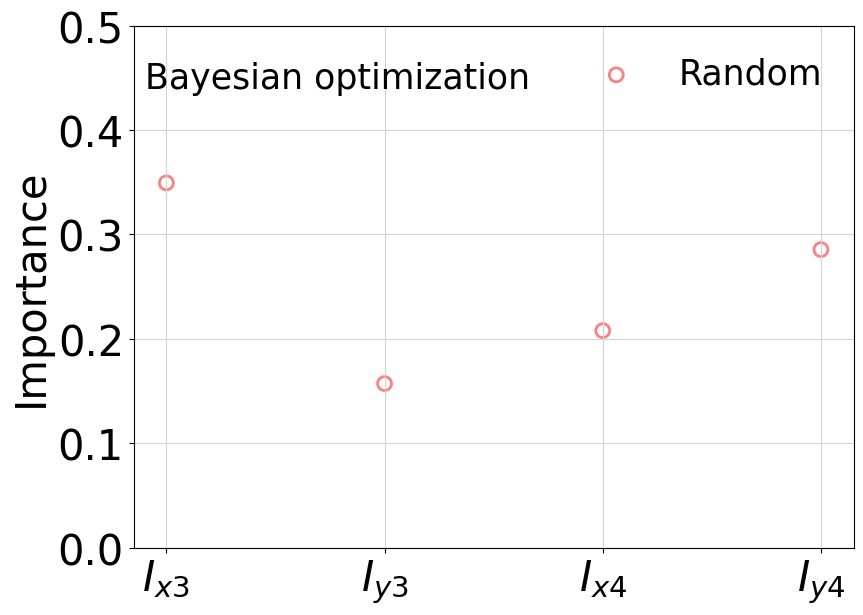

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[9,6])
ax = fig.add_subplot(1, 1, 1)
x = ['$I_{x3}$', '$I_{y3}$' , '$I_{x4}$' , '$I_{y4}$']

y0 = [I0 , I1 , I2 , I3]

ax.scatter(x, y0, s=100, alpha=0.5, marker='o', linewidths=2,
           facecolor='None', edgecolors='red', label='Random')


ax.set_ylabel('Importance', fontsize=30)
ax.legend(loc='upper right', frameon=False, fancybox=False, fontsize=25)
ax.text(-0.1, 0.44, "Bayesian optimization", fontsize=25)
# ax.text(-0.1, 1, "(b) TPE", fontsize=20)
# ax.text(-0.1, 1, "(b) CMA-ES", fontsize=25)
plt.ylim([0, 0.5])
plt.grid(which = "major" , color = "lightgray" , linestyle = "-")
#plt.xticks(rotation=70)
plt.tick_params(labelsize=30)
plt.subplots_adjust(left=0.18, right=0.98, bottom=0.10, top=0.97)
plt.show()